In [1]:
%matplotlib inline

# useful packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import networkx as nx
import time
import pandas as pd

from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit.quantum_info import Statevector
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
import qiskit

In [2]:
# Cobyla(maxiter = 400)
seeds = np.linspace(201, 10000, 10000 - 200)
Energy = []
iterations = []
execution_time = []

In [3]:
for i in np.arange(1, 11):
    df = pd.read_excel('static seeds ' + str(i) + '.xlsx')
    Energy += df['energy'].tolist()
    iterations += df['terminate iterations'].tolist()
    execution_time += df['time (s)'].tolist()

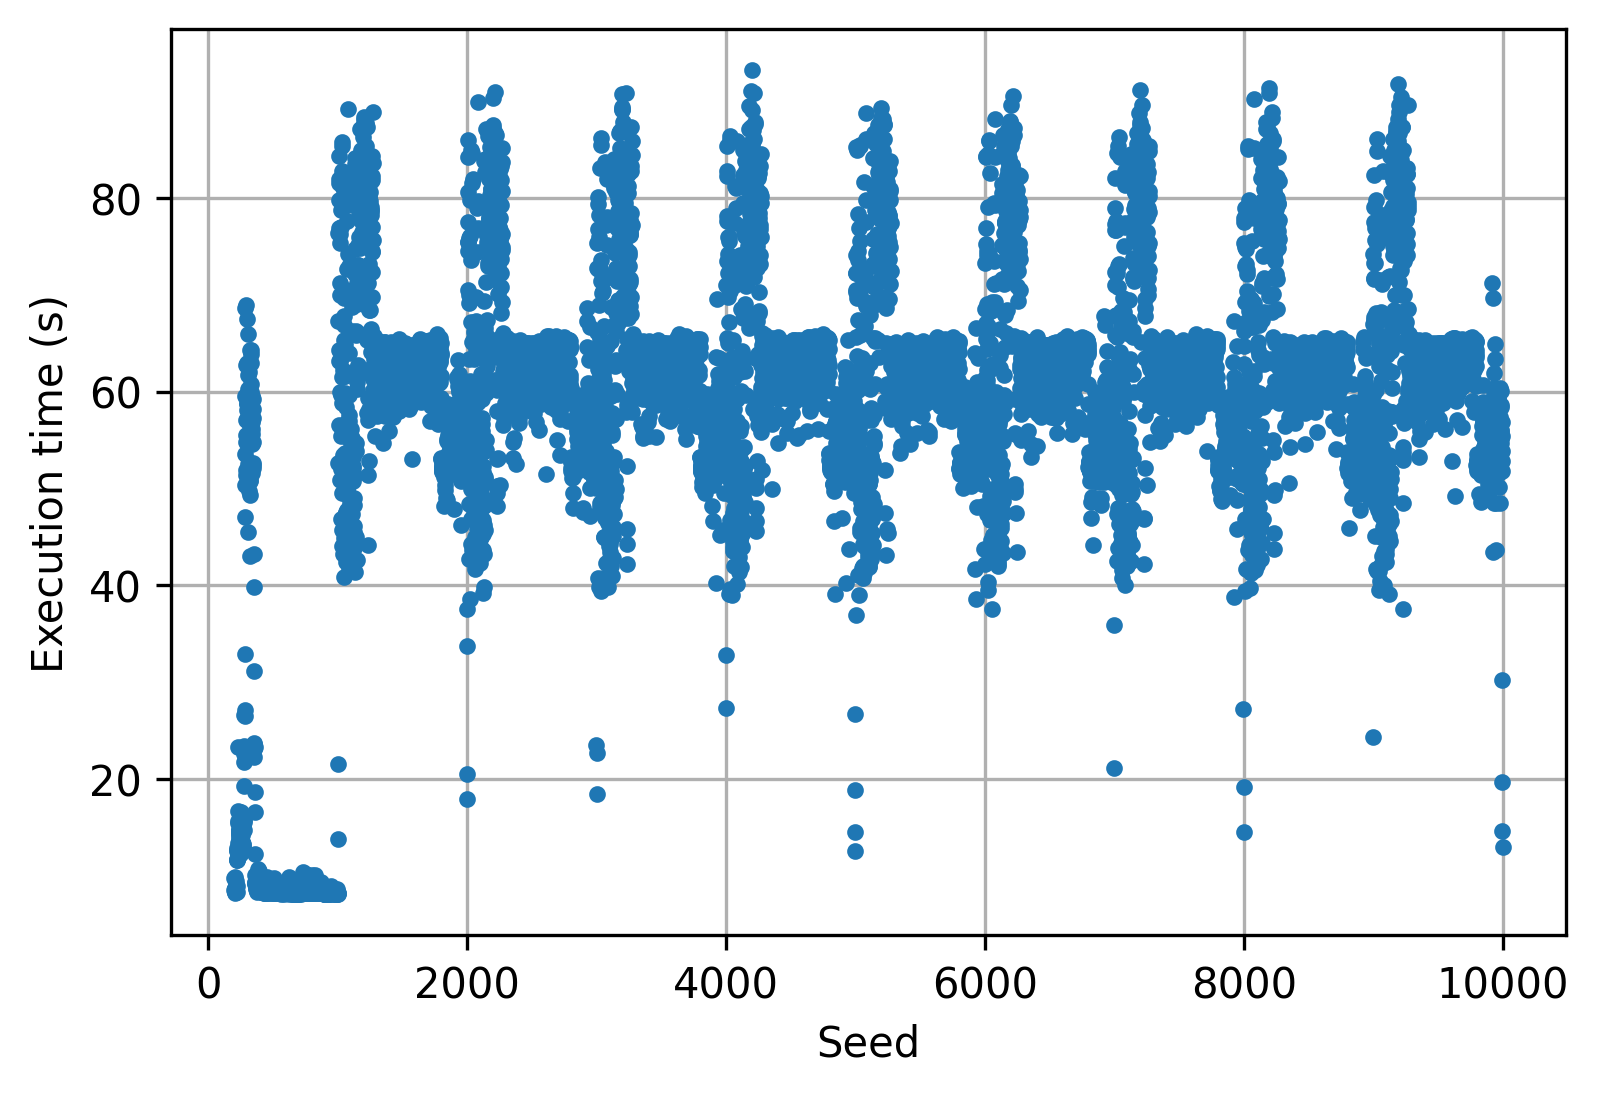

In [4]:
# seed v.s. execution time
plt.figure(dpi = 300)
plt.plot(seeds, execution_time, '.')
plt.xlabel('Seed')
plt.ylabel('Execution time (s)')
plt.grid()
plt.show()

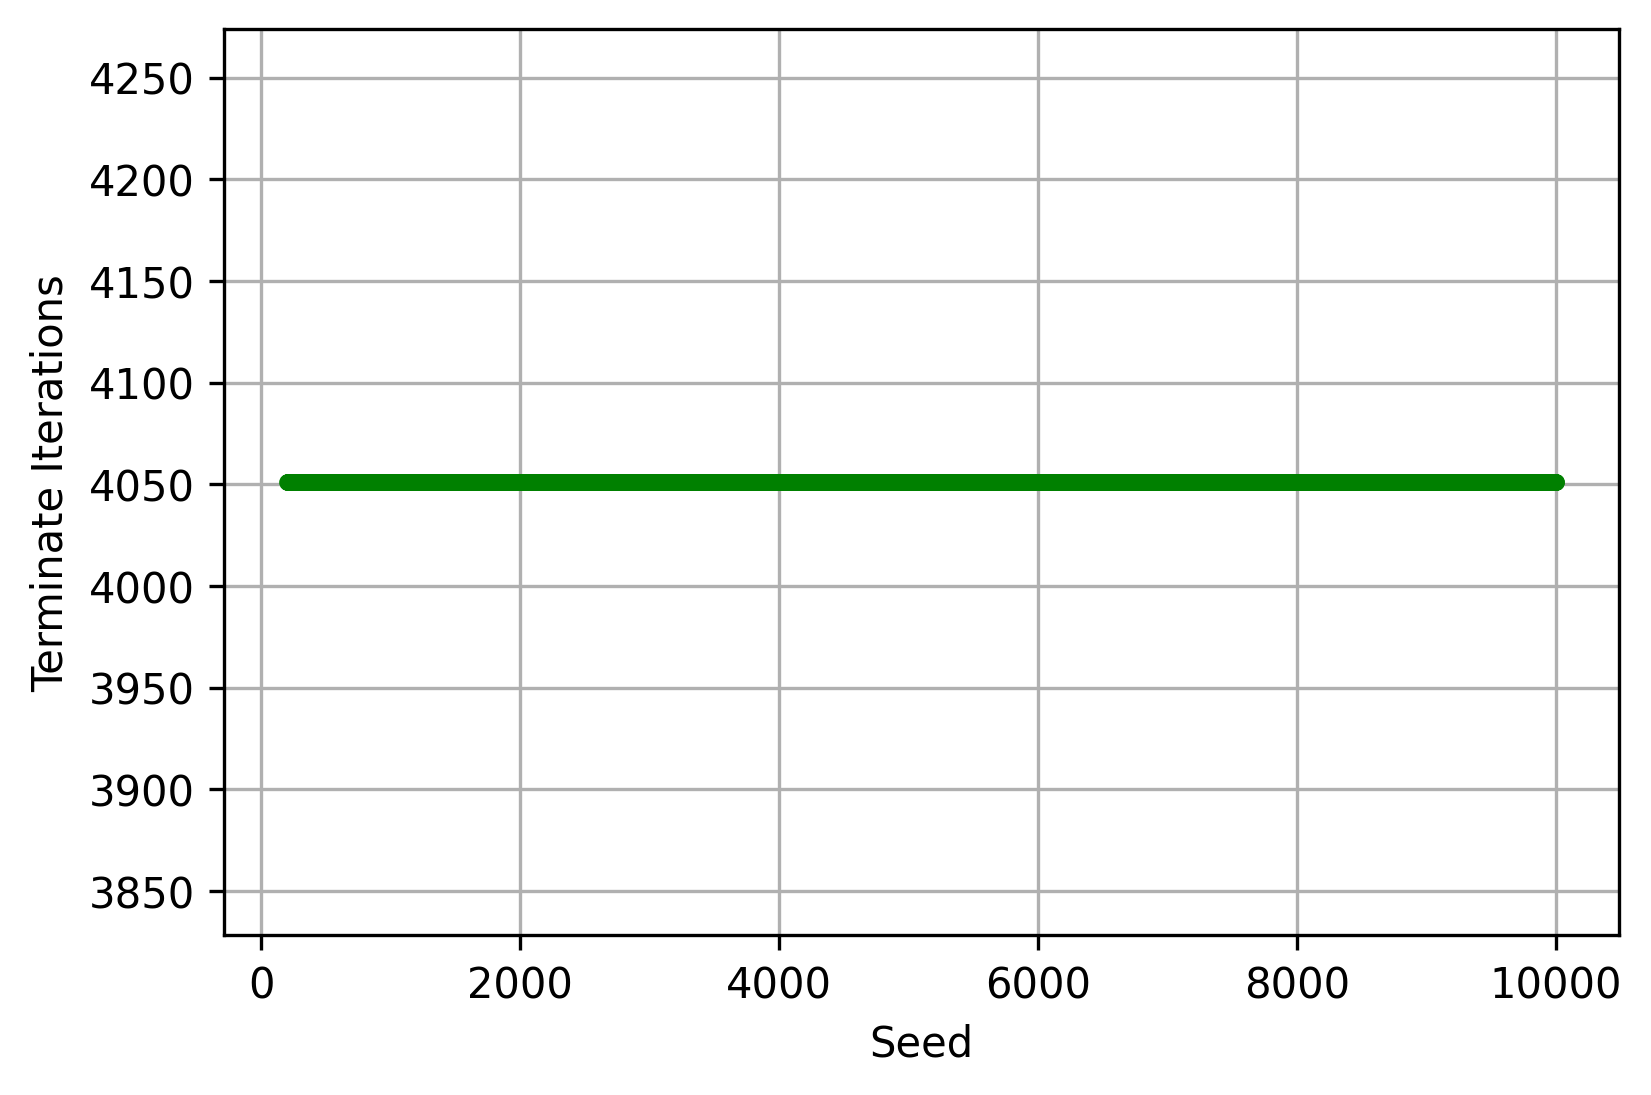

In [5]:
# seed v.s. iterations
plt.figure(dpi = 300)
plt.plot(seeds, iterations, 'g.')
plt.xlabel('Seed')
plt.ylabel('Terminate Iterations')
plt.grid()
plt.show()

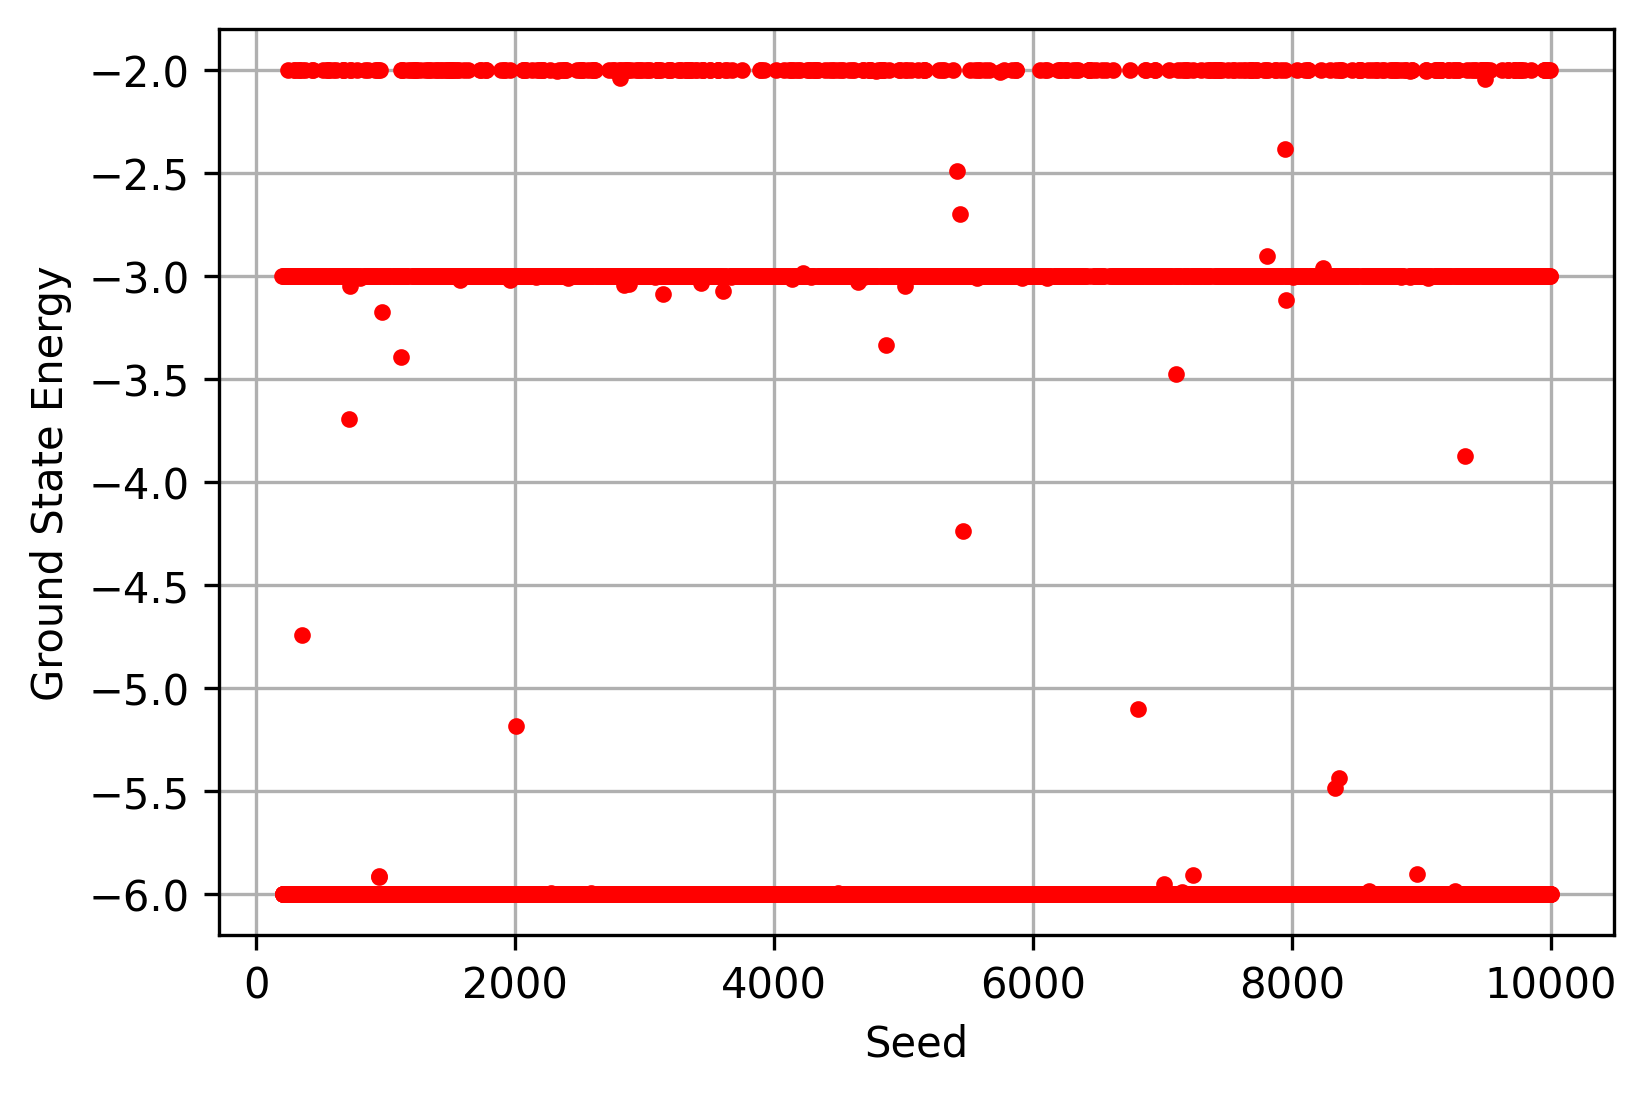

In [6]:
# seeds v.s. energy
plt.figure(dpi = 300)
plt.plot(seeds, Energy, 'r.')
plt.xlabel('Seed')
plt.ylabel('Ground State Energy')
plt.grid()
plt.show()

In [7]:
Energy

[-2.999999760771273,
 -2.99999995507311,
 -6.0,
 -5.999999999999998,
 -6.0,
 -6.0,
 -5.999999999999995,
 -5.999999999999997,
 -5.999999999999997,
 -5.999999999999997,
 -5.999999999999997,
 -2.999999460951351,
 -6.0,
 -6.0,
 -6.0,
 -5.999999999999998,
 -5.999999999999998,
 -2.999998432893359,
 -5.999999999999997,
 -2.999999880052214,
 -6.0,
 -5.999999999999995,
 -5.999999999999997,
 -5.999926054063344,
 -6.0,
 -5.999999999999997,
 -2.999999984252297,
 -6.0,
 -2.999999883153332,
 -2.999999998058209,
 -6.0,
 -6.0,
 -6.000000000000003,
 -2.99999990276104,
 -6.000000000000003,
 -5.999999999999997,
 -6.0,
 -6.0,
 -5.999999999999998,
 -5.999999999999997,
 -6.0,
 -5.999999999999993,
 -5.999999999999997,
 -5.999999999999997,
 -5.999999999999997,
 -1.999999584301803,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -6.0,
 -5.999999999999998,
 -5.999999999999997,
 -5.999999999999998,
 -5.999999999999998,
 -6.0,
 -5.999999999999998,
 -2.999999159450649,
 -6.000000000000005,
 -6.000000000000005,
 -6.0000

In [8]:
e = np.array(Energy)
two = np.where(e >= -2)
ratio2 = len(two[0]) / len(e)
ratio2 * 100

3.5306122448979593

In [9]:
three = np.where(e >= -3)
ratio3 = (len(three[0]) - len(two[0]))/len(e)
ratio3 * 100

16.387755102040817

In [10]:
(1 - ratio3 - ratio2) * 100

80.08163265306123